# IS 4487 Module 5

## Outline

 - Identify the target variable for an analysis based on the business problem.
 - Compute the mean of a binary variable.
 - Plot a numeric (or count) variable against a categorical
    variable.
 - Calculate a count (and a proportion) for a categorical variable
    and visualize the result into a plot.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_05_megatelco_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Megatelco Data Dictionary

 DEMOGRAPHIC VARIABLES:
 - College - has the customer attended some college (one, zero)
 - Income - annual income of customer
 - House - estimated price of the customer's home (if applicable)

 USAGE VARIABLES:
 - Data Overage Mb - Average number of megabytes that the customer used in excess of the plan limit (over last 12 months)
 - Data Leftover Mb - Average number of megabytes that the customer use was below the plan limit (over last 12 months)
 - Data Mb Used - Average number of megabytes used per month (over last 12 months)
 - Text Message Count - Average number of texts per month (over last 12 months)
 - Over 15 Minute Calls Per Month - Average number of calls over 15 minutes in duration per month (over last 12 months)
 - Average Call Duration- Average call duration (over last 12 months)

PHONE VARIABLES:
 - Operating System - Current operating system of phone
 - Handset Price - Retail price of the phone used by the customer

ATTITUDINAL VARIABLES:
 - Reported Satisfaction - Survey response to "How satisfied are you with your current phone plan?" (high, med, low)
 - Reported Usage Level - Survey response to "How much do your use your phone?" (high, med, low)
 - Considering Change of Plan - Survey response to "Are you currently planning to change companies when your contract expires?" (high, med, low)

OTHER VARIABLES
 - Leave - Did this customer churn with the last contract expiration? (LEAVE, STAY)
 - ID - Customer identifier

##Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the Megatelco dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe


In [3]:

url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Labs/DataSets/megatelco_leave_survey.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()


college  income  data_overage_mb  data_leftover_mb  data_mb_used  \
0     one  403137               70                 0          6605   
1    zero  129700               67                16          6028   
2    zero   69741               60                 0          1482   
3     one  377572                0                22          3005   
4    zero  382080                0                 0          1794   

   text_message_count   house  handset_price  over_15mins_calls_per_month  \
0                 199  841317            653                          5.0   
1                 134  476664           1193                          5.0   
2                 176  810225           1037                          3.0   
3                 184  826967           1161                          0.0   
4                  74  951896           1023                          0.0   

   average_call_duration reported_satisfaction reported_usage_level  \
0                      8                   low                  low   
1                      5                   low                  low   
2                      8                   low                  low   
3                      5                   low                  low   
4                     14                   low                  low   

  considering_change_of_plan  leave     id operating_system  
0                        yes  LEAVE   8183          Android  
1                        yes  LEAVE  12501              IOS  
2                        yes   STAY   7425              IOS  
3                         no  LEAVE  13488              IOS  
4                        yes   STAY  11389              IOS

## Clean up the dataset  

In [4]:
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 10000)]
df_clean.describe()

income  data_overage_mb  data_leftover_mb  data_mb_used  \
count   14993.000000     14993.000000      14993.000000  14993.000000   
mean   242025.183752       153.580804         37.524511   4202.893951   
std    109556.878020       113.002587         28.044642   2202.492183   
min     52491.000000         0.000000          0.000000    400.000000   
25%    147844.000000        54.000000         12.000000   2297.000000   
50%    241656.000000       151.000000         35.000000   4223.000000   
75%    336470.000000       242.000000         62.000000   6080.000000   
max    432000.000000       380.000000         89.000000   8000.000000   

       text_message_count         house  handset_price  \
count        14993.000000  1.499300e+04    14993.00000   
mean           135.626025  8.771541e+05      780.65057   
std             48.837544  2.869273e+05      326.59192   
min             52.000000  3.200010e+05      215.00000   
25%             93.000000  6.444950e+05      498.00000   
50%            135.000000  8.762710e+05      778.00000   
75%            178.000000  1.098785e+06     1064.00000   
max            220.000000  1.456389e+06     1350.00000   

       over_15mins_calls_per_month  average_call_duration            id  
count                 14990.000000           14993.000000  14993.000000  
mean                     10.571181               9.733676  11862.359501  
std                       8.401508               5.194211   6812.221611  
min                       0.000000               1.000000      2.000000  
25%                       3.000000               5.000000   6141.000000  
50%                       9.000000              10.000000  11765.000000  
75%                      17.000000              14.000000  17398.000000  
max                      35.000000              19.000000  25354.000000

## Calculate distribution of the outcome  

What is the proportion of people who churned?

In [5]:
df_clean[['house','leave']].groupby('leave').mean().round(2)

house
leave           
LEAVE  757607.46
STAY   995921.88

# Create basic charts

- Bar chart
- Histogram
- Box plot
- Scatter plot

<Axes: xlabel='leave'>

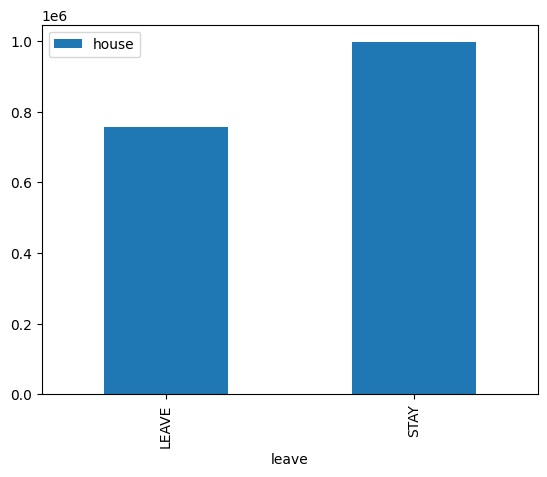

In [6]:
#Bar chart
df_clean[['house','leave']].groupby('leave').mean('house').plot.bar()


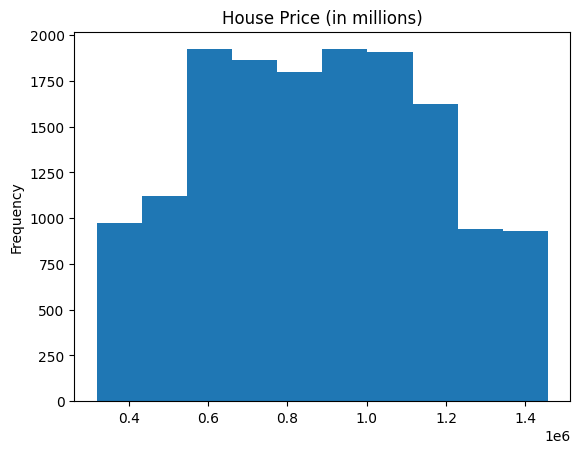

In [7]:
#Histogram
hist = df_clean['house'].plot.hist(bins=10,title='House Price (in millions)')


<Axes: title={'center': 'house'}, xlabel='[leave]'>

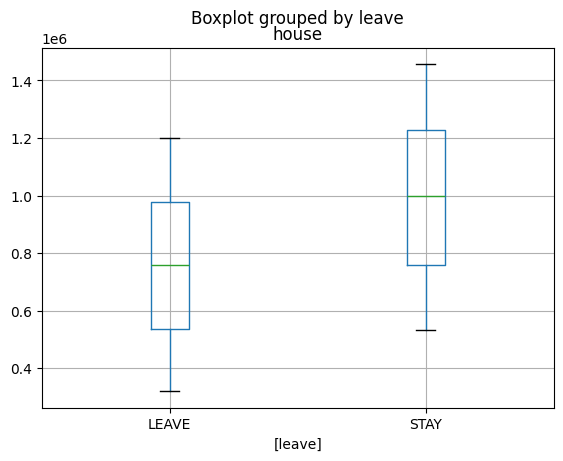

In [8]:
#Boxplot
df_clean[['leave','house']].boxplot(by='leave')

# Explore Relationships

###How does College affect leaving?

<Axes: xlabel='leave'>

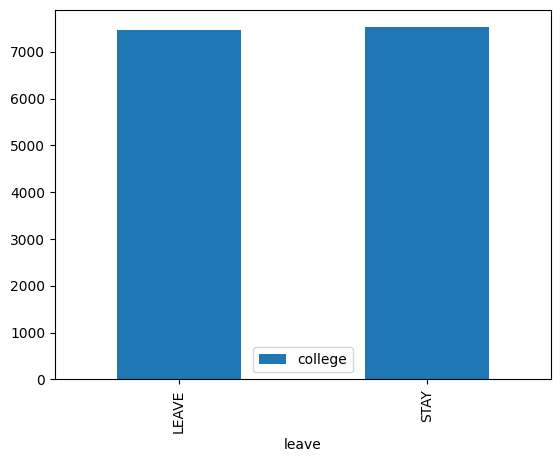

In [9]:
#Bar chart with counts
df_clean[['college','leave']].groupby('leave').count().plot.bar()

<Axes: xlabel='leave'>

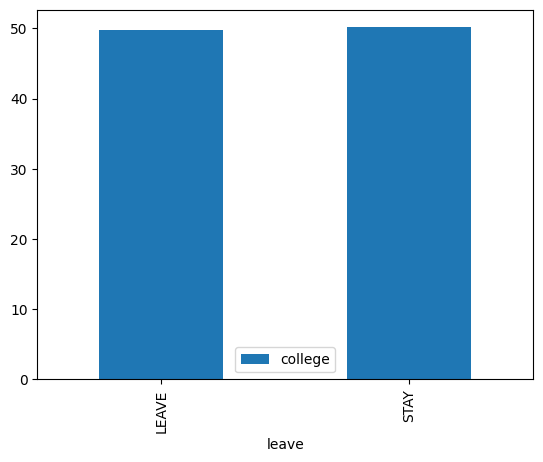

In [10]:
#Bar chart with percentage
college_summary = df_clean[['college','leave']].groupby('leave').count()

college_summary['college'] = (college_summary['college'] / college_summary['college'].sum()) * 100
#college_summary.head()
college_summary.plot.bar()

### How does phone price affect leaving?

<Axes: xlabel='leave'>

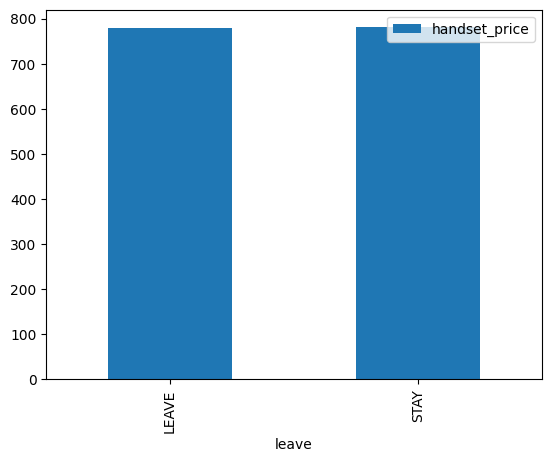

In [11]:
#Bar chart with mean price
handset_price_summary = df_clean[['handset_price','leave']].groupby('leave').mean(['handset_price'])
#handset_price_summary.head()

handset_price_summary.plot.bar()

### How about considering leaving?

<Axes: xlabel='leave'>

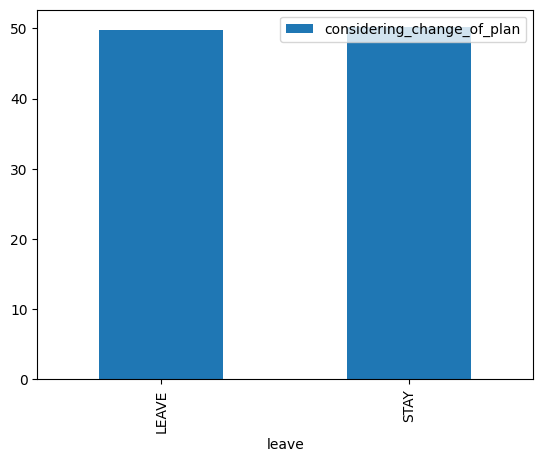

In [12]:
#Bar chart with percentage
plan = df_clean[['considering_change_of_plan','leave']].groupby('leave').count()

plan['considering_change_of_plan'] = (plan['considering_change_of_plan'] / plan['considering_change_of_plan'].sum()) * 100

plan.plot.bar()

## Create a Pair Plot
➡️ Assignment Tasks
- Import seaborn
- Create a Seaborn "pairplot" using all variables, with the color determine by "leave"
- Display the plot

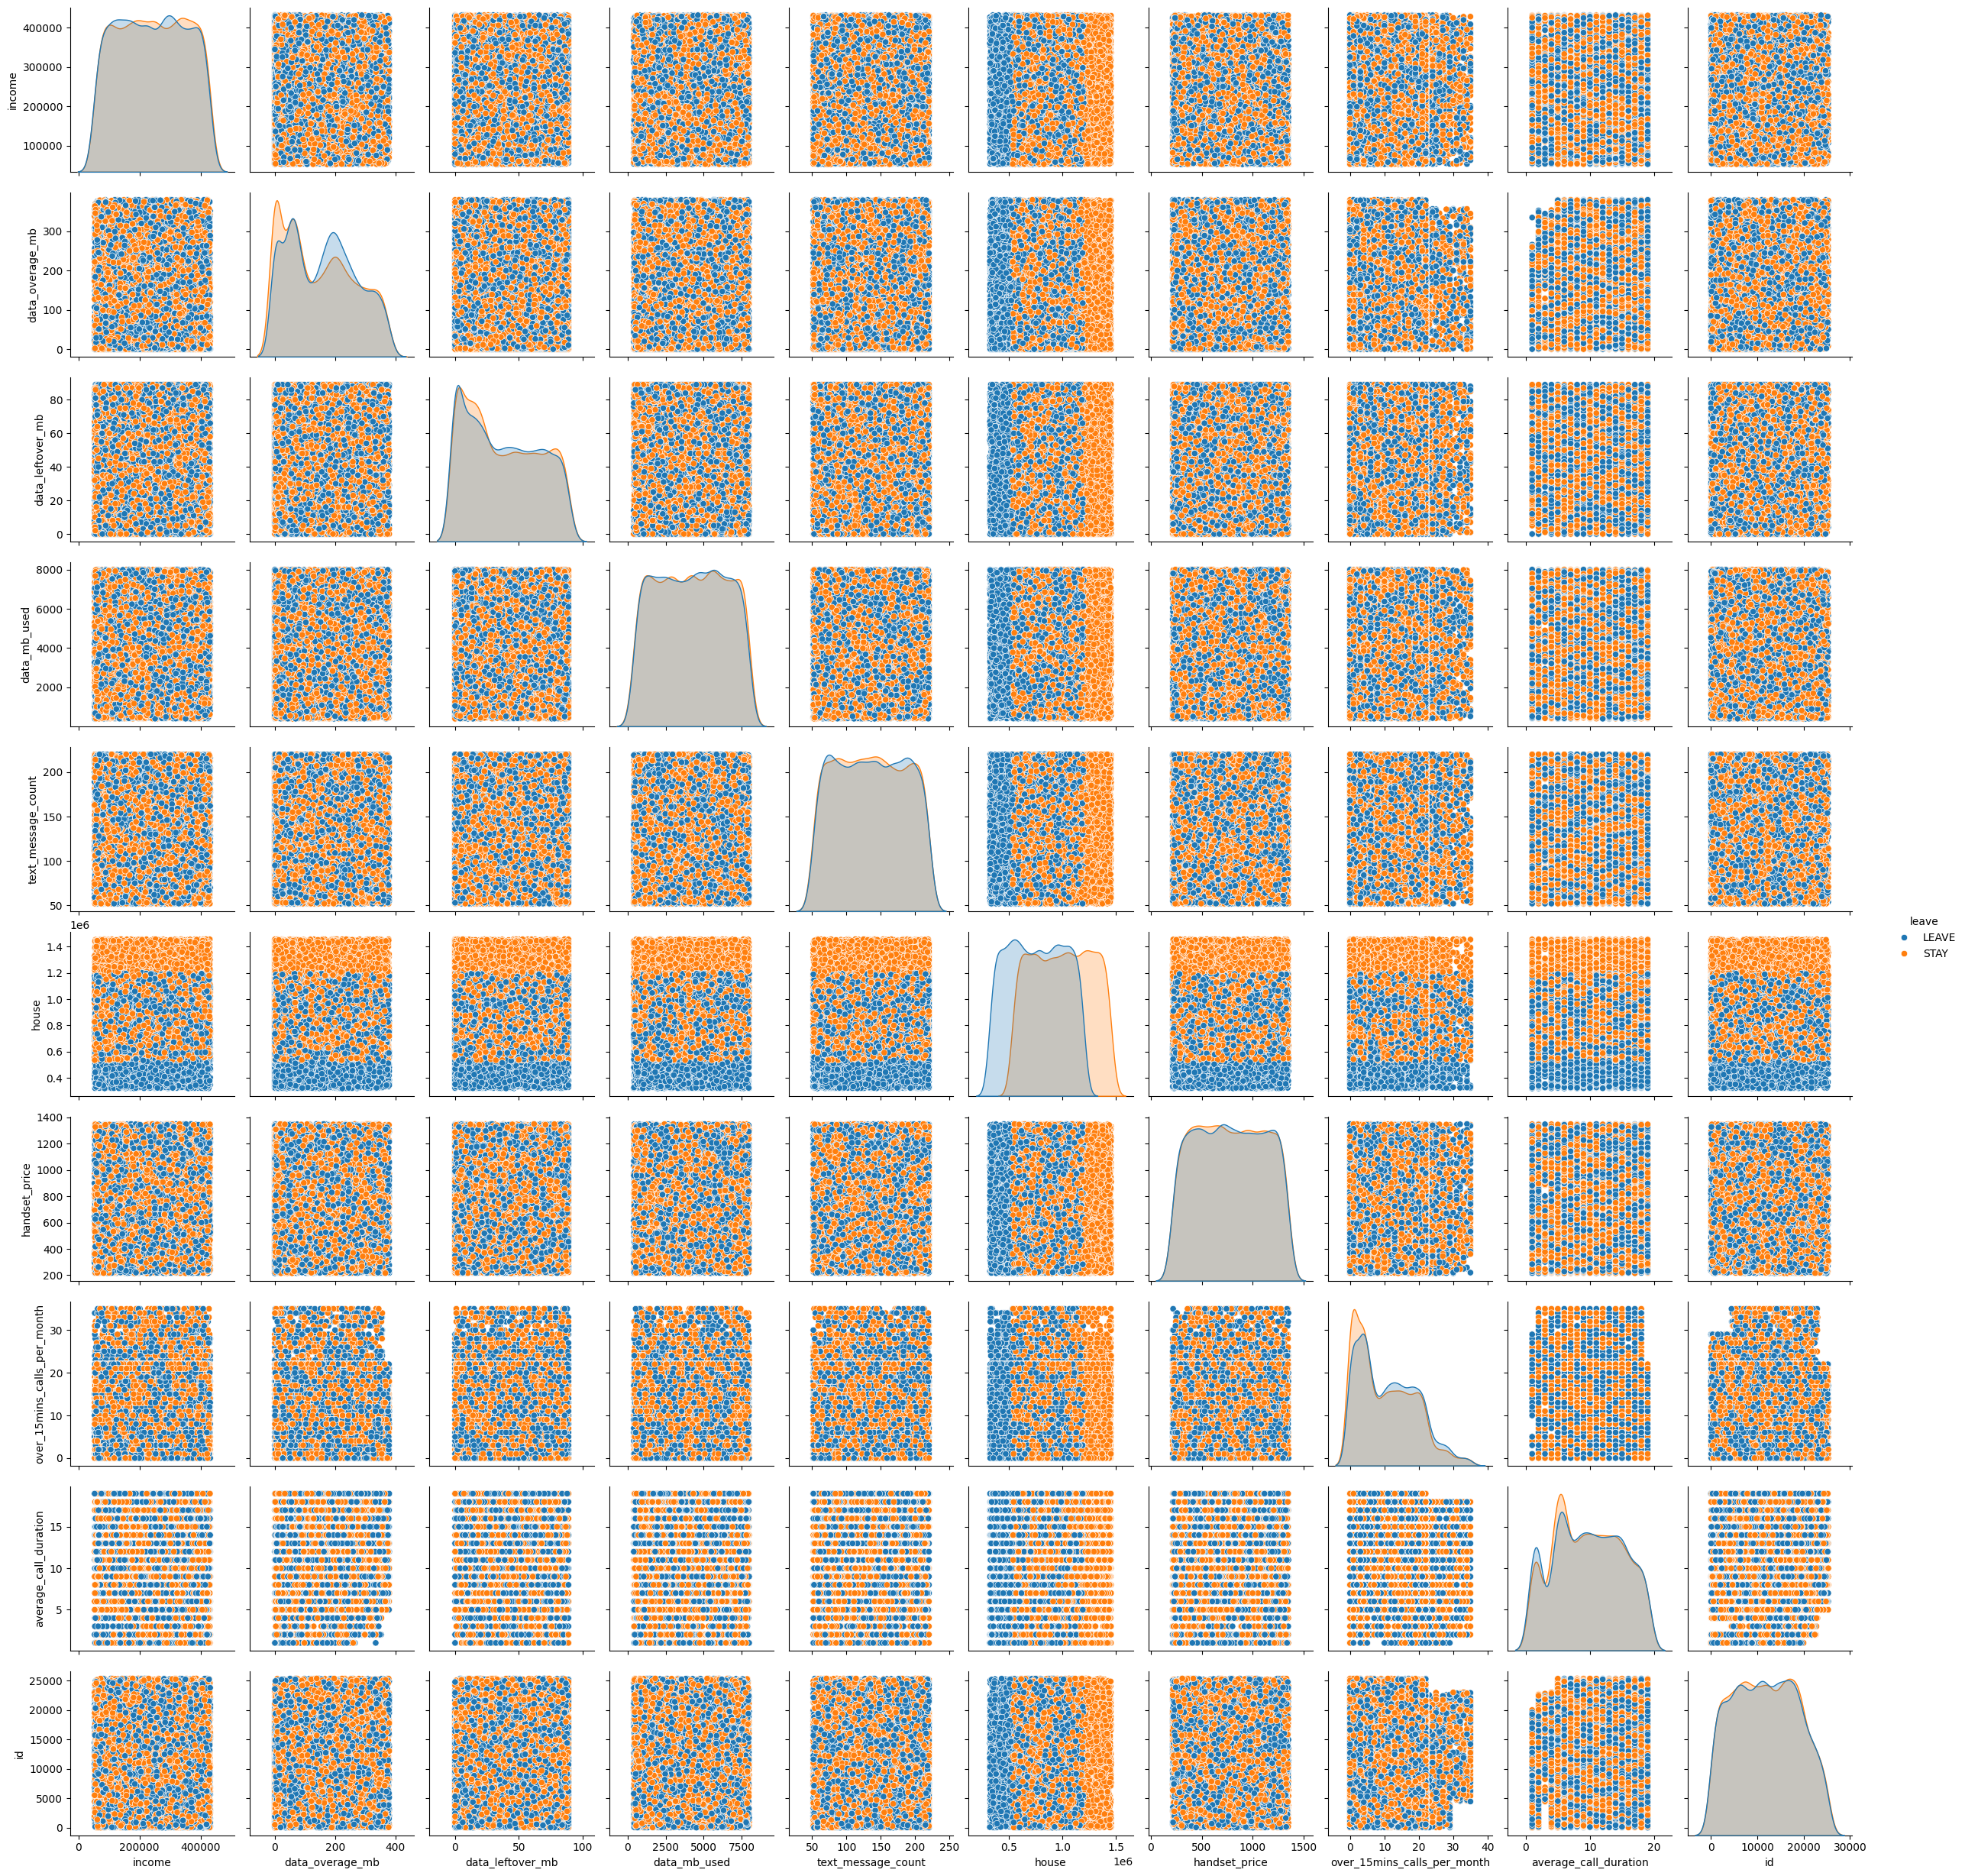

In [13]:
#pair plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with 'leave' as the hue
sns.pairplot(df_clean, hue='leave', diag_kind='kde')

# Display the plot
plt.show()


## Additional Cleanup

➡️ Assignment Tasks
- Remove any records with null values from the dataframe

In [14]:
# Remove rows with null values
df_clean = df_clean.dropna()

# Verify no null values remain
print(df_clean.isnull().sum())


college                        0
income                         0
data_overage_mb                0
data_leftover_mb               0
data_mb_used                   0
text_message_count             0
house                          0
handset_price                  0
over_15mins_calls_per_month    0
average_call_duration          0
reported_satisfaction          0
reported_usage_level           0
considering_change_of_plan     0
leave                          0
id                             0
operating_system               0
dtype: int64


## Summarize Data

➡️ Assignment Tasks
- Create a second set of charts that include the outlier values (house, income, price).   How do the outliers affect the values in the charts?

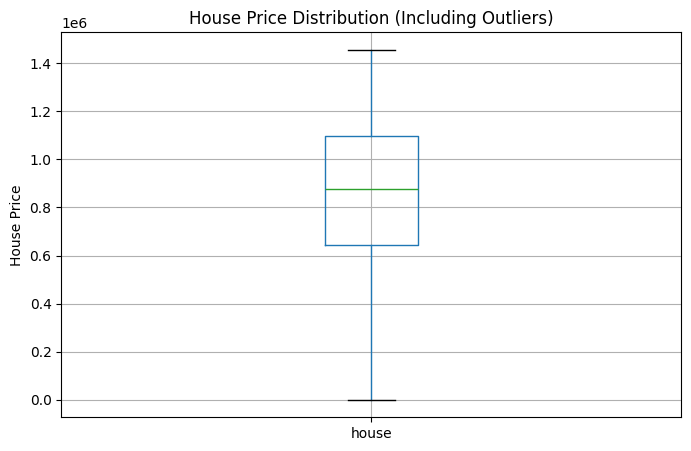

In [15]:
#house price
plt.figure(figsize=(8, 5))
df.boxplot(column='house')
plt.title('House Price Distribution (Including Outliers)')
plt.ylabel('House Price')
plt.show()


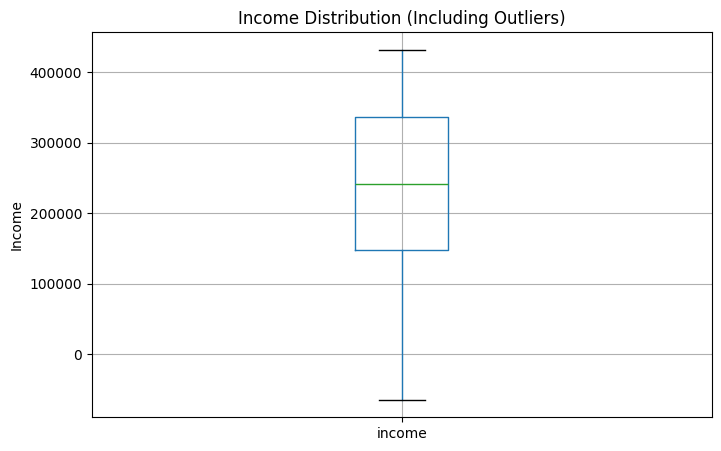

In [16]:
#income
plt.figure(figsize=(8, 5))
df.boxplot(column='income')
plt.title('Income Distribution (Including Outliers)')
plt.ylabel('Income')
plt.show()

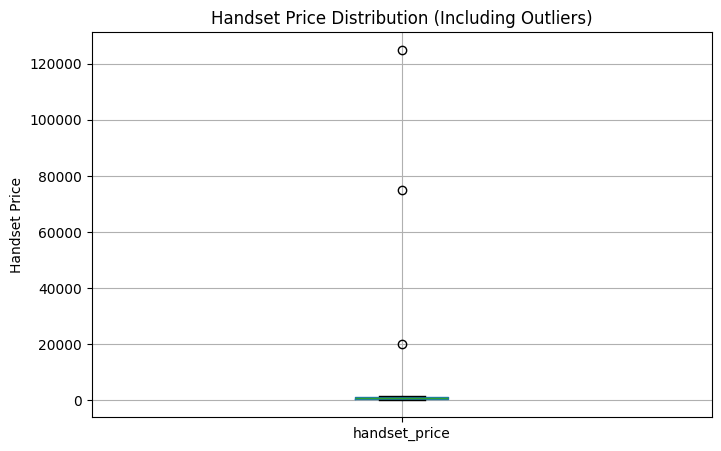

In [17]:
#price
plt.figure(figsize=(8, 5))
df.boxplot(column='handset_price')
plt.title('Handset Price Distribution (Including Outliers)')
plt.ylabel('Handset Price')
plt.show()

## Covariance

➡️ Assignment Task
- Create a covariance matrix using all of the applicable independent variables

                                 college        income  data_overage_mb  \
college                         0.249111 -5.363023e+01        -0.994270   
income                        -53.630229  1.200138e+10     11001.605766   
data_overage_mb                -0.994270  1.100161e+04     12768.194213   
data_leftover_mb               -0.236285  3.014654e+04       436.135270   
data_mb_used                   -2.854909  1.001925e+06      -601.627211   
text_message_count              0.140857  3.158607e+04        20.652534   
house                       -1693.225475  1.671001e+08   -866166.068584   
handset_price                   1.675190  1.338752e+05        50.798069   
over_15mins_calls_per_month    -0.024111 -4.774906e+02       280.780052   
average_call_duration          -0.056723  7.453071e+03       133.005838   
reported_satisfaction           0.002095  7.000796e+02        -8.200714   
reported_usage_level            0.004526 -1.178294e+03       -14.774192   
considering_change_of_pla

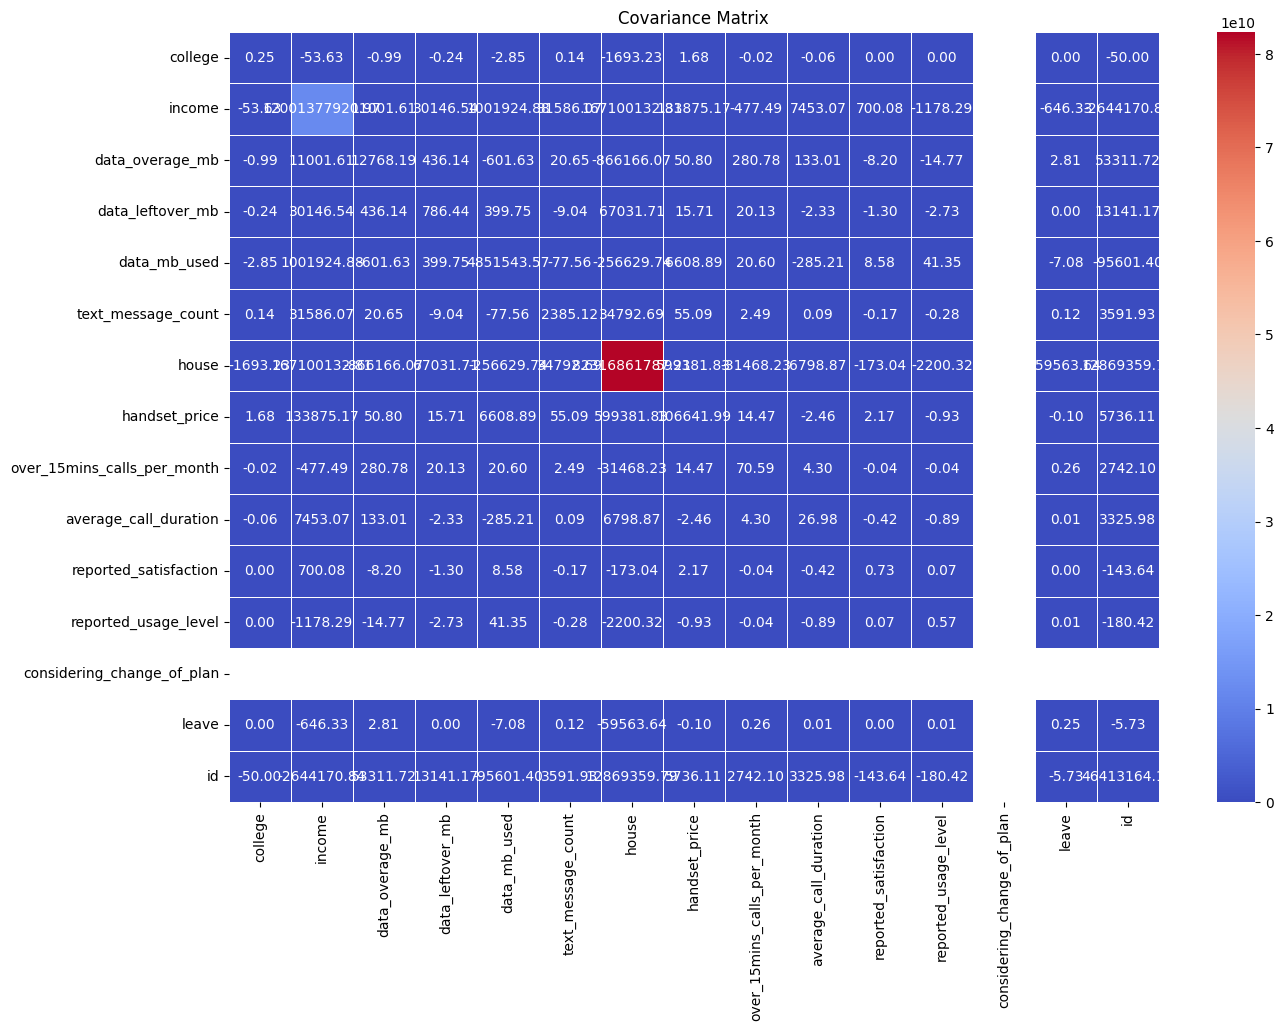

In [22]:
# Copy the dataframe to avoid modifying the original
df_numeric = df_clean.copy()

# Convert binary categorical variables to numeric
df_numeric['college'] = df_numeric['college'].map({'one': 1, 'zero': 0})

# Convert ordinal categorical variables to numeric
ordinal_map = {'high': 2, 'med': 1, 'low': 0}
df_numeric['reported_satisfaction'] = df_numeric['reported_satisfaction'].map(ordinal_map)
df_numeric['reported_usage_level'] = df_numeric['reported_usage_level'].map(ordinal_map)
df_numeric['considering_change_of_plan'] = df_numeric['considering_change_of_plan'].map(ordinal_map)

# Convert target variable ('leave') to binary
df_numeric['leave'] = df_numeric['leave'].map({'LEAVE': 1, 'STAY': 0})

# Drop non-numeric columns that cannot be converted
df_numeric = df_numeric.select_dtypes(include=['number'])  # Keep only numeric columns

# Compute the covariance matrix
cov_matrix = df_numeric.cov()

# Display the covariance matrix
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix')
plt.show()

➡️ Assignment Task
- In 100 words or less, describe what insight you can derive from the covariance matrix.  What does it tell us about the data?  

The covariance matrix reveals relationships between numerical variables in the dataset. Strong positive values indicate that two variables increase together, while strong negative values suggest an inverse relationship. For instance, higher income may correlate with lower churn, implying financial stability reduces customer attrition. Likewise, high handset price might relate to customer retention, as premium users may be less likely to switch providers. Additionally, data overage and call duration could influence churn, highlighting potential dissatisfaction with plan limits. By identifying these trends, businesses can refine pricing strategies, improve customer retention efforts, and tailor marketing to high-risk churn segments effectively.